# ***CardioVascular CSV Dataset Model Training***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Introduction***

-The Cardiovascular disease dataset consists of 70,000 records of patients data.

-This dataset is made up of 12 columns of patients records.

-All of the dataset values were collected at the moment of medical examination.

In [ ]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
#load in the dataset into a pandas dataframe and check its structure
cardiovascular_bp = pd.read_csv("/content/cardiovascular_bp.csv")


In [ ]:
cardiovascular_bp.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol_level,glucose,smoker,alcoholic,physically_active,cardiovascular_disease,bmi,diastolic_category
0,0,51,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,No,22.0,80
1,1,56,Female,156,85.0,140,90,Extremely High,Normal,No,No,Yes,Yes,34.9,90
2,2,52,Female,165,64.0,130,70,Extremely High,Normal,No,No,No,Yes,23.5,70
3,3,49,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes,28.7,100
4,4,48,Female,156,56.0,100,60,Normal,Normal,No,No,No,No,23.0,60


In [ ]:
cardiovascular_bp.columns

In [ ]:
#File Download
cardiovascular_bp.to_csv('cardiovascular_bp.csv', index= False)

In [ ]:
#Importing sklearn

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# Make sure the CSV file path is correct
df = pd.read_csv("/content/cardiovascular_bp.csv")


# Display basic info to confirm successful load
print(" Dataset Loaded Successfully!")
print(df.shape)
print(df.head())

 Dataset Loaded Successfully!
(68675, 15)
   id  age  gender  height  weight  systolic  diastolic cholesterol_level  \
0   0   51    Male     168    62.0       110         80            Normal   
1   1   56  Female     156    85.0       140         90    Extremely High   
2   2   52  Female     165    64.0       130         70    Extremely High   
3   3   49    Male     169    82.0       150        100            Normal   
4   4   48  Female     156    56.0       100         60            Normal   

  glucose smoker alcoholic physically_active cardiovascular_disease   bmi  \
0  Normal     No        No               Yes                     No  22.0   
1  Normal     No        No               Yes                    Yes  34.9   
2  Normal     No        No                No                    Yes  23.5   
3  Normal     No        No               Yes                    Yes  28.7   
4  Normal     No        No                No                     No  23.0   

   diastolic_category  
0       

In [ ]:
df.columns

In [ ]:
# Split features and target
X = df.drop('cardiovascular_disease', axis=1)
y = df['cardiovascular_disease']

Check class balance for the target column


In [ ]:
# Check class balance for the target column
class_counts = df['cardiovascular_disease'].value_counts()
balance_ratio = class_counts.min() / class_counts.max()

print("Class Distribution:\n", class_counts)
print(f"\nBalance Ratio (smaller/larger class): {balance_ratio:.2f}")

# Interpretation
if balance_ratio < 0.8:
    print("\n The dataset is imbalanced.")
else:
    print("\n The dataset is relatively balanced.")

In [ ]:
df.columns

# ***TRAIN TEST & VALIDATE***

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load CSV
df = pd.read_csv("/content/cardiovascular_bp.csv")

# Drop 'id' column (not a feature)
df = df.drop('id', axis=1)

# Strip spaces and lowercase all object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Map Yes/No columns to 1/0
yes_no_cols = ['physically_active', 'cardiovascular_disease', 'smoker', 'alcoholic', 'gender']
for col in yes_no_cols:
    df[col] = df[col].map({'yes':1, 'no':0, 'male':1, 'female':0})

# Encode cholesterol_level and glucose using LabelEncoder
for col in ['cholesterol_level', 'glucose']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN (in case there were unmapped strings)
df = df.dropna()

# Separate features and target
features = ['age', 'gender', 'height', 'weight', 'systolic', 'diastolic',
            'cholesterol_level', 'glucose', 'smoker', 'alcoholic', 'physically_active', 'bmi']
target = 'cardiovascular_disease'

X = df[features]
y = df[target].astype(int)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("X shape:", X_scaled.shape)
print("y shape:", y.shape)


In [ ]:
#Train / Validation / Test Split

#We’ll do 70% train, 15% validation, 15% test:

from sklearn.model_selection import train_test_split

# First, split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Then, split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train on training set
model.fit(X_train, y_train)

# Predict on train, validation, and test sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calculate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


In [ ]:
import pandas as pd

df = pd.read_csv("/content/cardiovascular_bp.csv")

# Drop ID column
df = df.drop('id', axis=1)

# Check unique values for all columns
for col in df.columns:
    print(f"{col} unique values:\n{df[col].unique()}\n")


# MODELS

*1. Naïve Bayes*

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# Naive Bayes Model
# -----------------------------
# Initialize the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model on the training set
nb_model.fit(X_train, y_train)

# Make predictions on train, validation, and test sets
y_train_pred_nb = nb_model.predict(X_train)
y_val_pred_nb = nb_model.predict(X_val)
y_test_pred_nb = nb_model.predict(X_test)

# Calculate accuracy
train_acc_nb = accuracy_score(y_train, y_train_pred_nb)
val_acc_nb = accuracy_score(y_val, y_val_pred_nb)
test_acc_nb = accuracy_score(y_test, y_test_pred_nb)

# Print results
print("=== Naive Bayes ===")
print("Train Accuracy:", train_acc_nb)
print("Validation Accuracy:", val_acc_nb)
print("Test Accuracy:", test_acc_nb)
print("\nValidation Classification Report:\n")
print(classification_report(y_val, y_val_pred_nb, target_names=['No CVD','CVD']))


=== Naive Bayes ===
Train Accuracy: 0.7068563820935264
Validation Accuracy: 0.7042034753907388
Test Accuracy: 0.7085032032615026

Validation Classification Report:

              precision    recall  f1-score   support

      No CVD       0.68      0.80      0.73      5208
         CVD       0.75      0.61      0.67      5093

    accuracy                           0.70     10301
   macro avg       0.71      0.70      0.70     10301
weighted avg       0.71      0.70      0.70     10301



*2. Linear Models*

In [ ]:
from sklearn.linear_model import LogisticRegression

# -----------------------------
# Logistic Regression Model
# -----------------------------
# Initialize the Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on train, validation, and test sets
y_train_pred_lr = lr_model.predict(X_train)
y_val_pred_lr = lr_model.predict(X_val)
y_test_pred_lr = lr_model.predict(X_test)

# Calculate accuracy
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
val_acc_lr = accuracy_score(y_val, y_val_pred_lr)
test_acc_lr = accuracy_score(y_test, y_test_pred_lr)

# Print results
print("=== Logistic Regression ===")
print("Train Accuracy:", train_acc_lr)
print("Validation Accuracy:", val_acc_lr)
print("Test Accuracy:", test_acc_lr)
print("\nValidation Classification Report:\n")
print(classification_report(y_val, y_val_pred_lr, target_names=['No CVD','CVD']))


*3. KNN Classifier*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# -----------------------------
# k-Nearest Neighbors Model
# -----------------------------
# Initialize the kNN classifier (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knn_model.fit(X_train, y_train)

# Make predictions on train, validation, and test sets
y_train_pred_knn = knn_model.predict(X_train)
y_val_pred_knn = knn_model.predict(X_val)
y_test_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
val_acc_knn = accuracy_score(y_val, y_val_pred_knn)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)

# Print results
print("=== k-Nearest Neighbors ===")
print("Train Accuracy:", train_acc_knn)
print("Validation Accuracy:", val_acc_knn)
print("Test Accuracy:", test_acc_knn)
print("\nValidation Classification Report:\n")
print(classification_report(y_val, y_val_pred_knn, target_names=['No CVD','CVD']))


*4. XGBoost Classifier*

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("/content/cardiovascular_bp.csv")

# Drop id column
df = df.drop('id', axis=1)

# -----------------------------
# 2. Encode categorical columns safely
# -----------------------------
# Gender
df['gender'] = df['gender'].map({'Male':1, 'Female':0})

# Yes/No columns
for col in ['smoker', 'alcoholic', 'physically_active', 'cardiovascular_disease']:
    df[col] = df[col].map({'Yes':1, 'No':0})

# Encode cholesterol_level and glucose
for col in ['cholesterol_level', 'glucose']:
    df[col] = LabelEncoder().fit_transform(df[col])

# -----------------------------
# 3. Define features and target
# -----------------------------
numeric_cols = ['age','gender','height','weight','systolic','diastolic',
                'cholesterol_level','glucose','smoker','alcoholic','physically_active','bmi']

X = df[numeric_cols]
y = df['cardiovascular_disease']

# -----------------------------
# 4. Scale features
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 5. Split data: Train / Validation / Test
# -----------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)

# -----------------------------
# 6. Train XGBoost (without early stopping issues)
# -----------------------------
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=100  # reasonable default
)

# Train model
model.fit(X_train, y_train)

# -----------------------------
# 7. Evaluate
# -----------------------------
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nValidation Classification Report:\n")
print(classification_report(y_val, y_val_pred, target_names=['No CVD','CVD']))


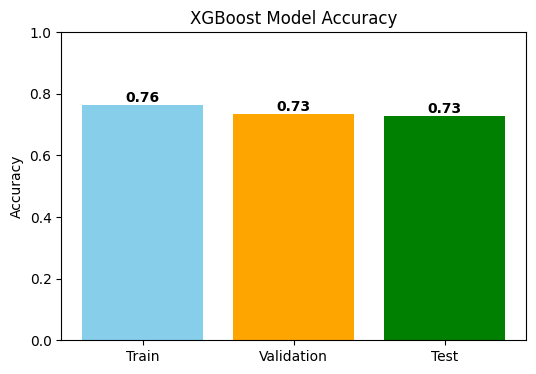

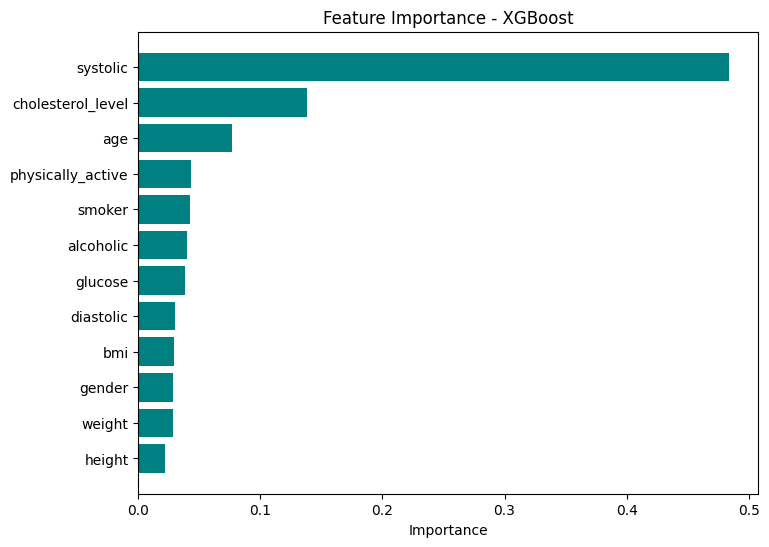

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1. Bar chart of accuracies
# -----------------------------
accuracies = [accuracy_score(y_train, y_train_pred),
              accuracy_score(y_val, y_val_pred),
              accuracy_score(y_test, y_test_pred)]

labels = ['Train', 'Validation', 'Test']

plt.figure(figsize=(6,4))
plt.bar(labels, accuracies, color=['skyblue','orange','green'])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("XGBoost Model Accuracy")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

# -----------------------------
# 2. Feature importance plot
# -----------------------------
importances = model.feature_importances_
feature_names = numeric_cols

# Sort features by importance
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], color='teal')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.title("Feature Importance - XGBoost")
plt.show()


## Confusion matrices for all models (Test set)

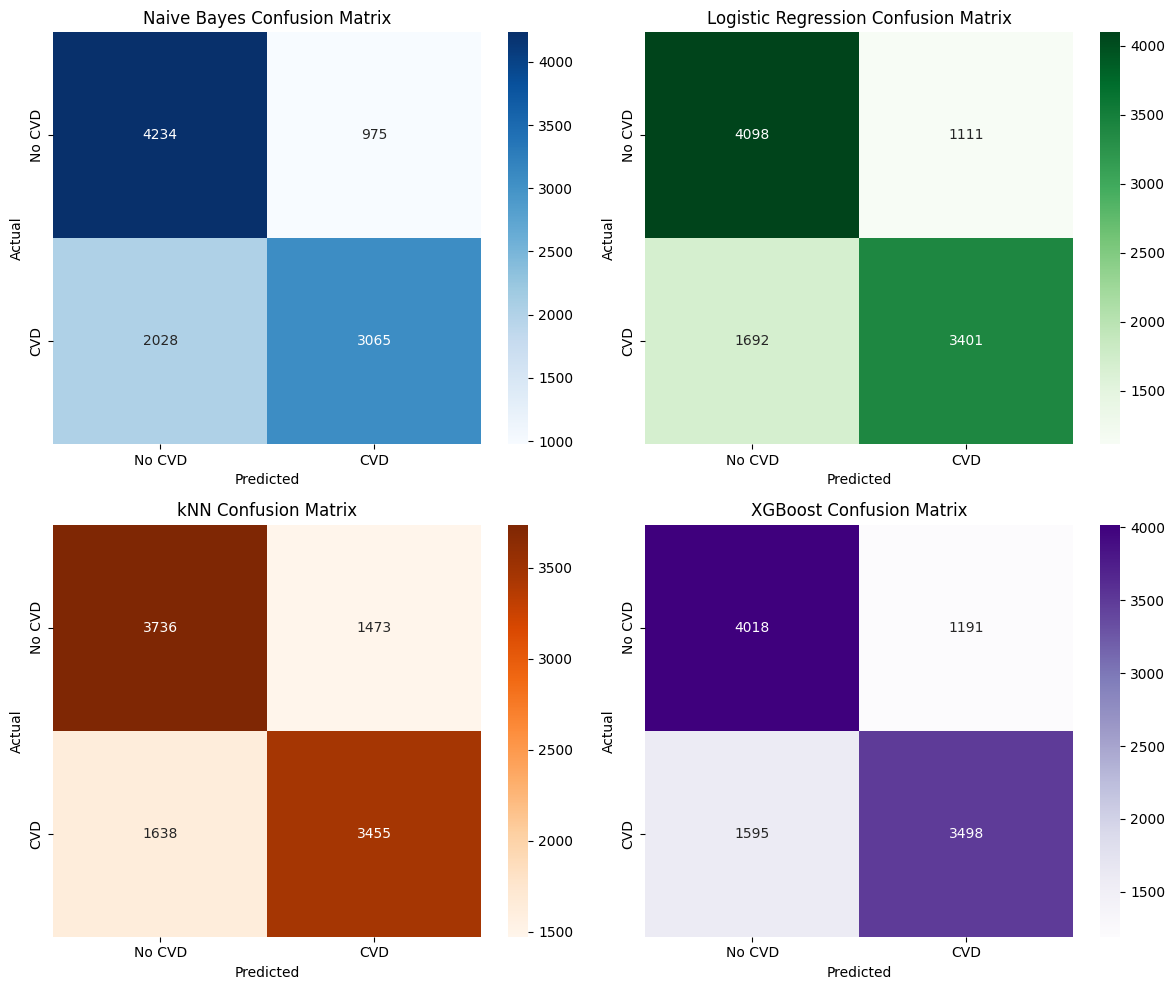

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# -----------------------------
# Confusion matrices for all models (Test set)
# -----------------------------

# Compute confusion matrices
cm_nb_test = confusion_matrix(y_test, y_test_pred_nb)
cm_lr_test = confusion_matrix(y_test, y_test_pred_lr)
cm_knn_test = confusion_matrix(y_test, y_test_pred_knn)
cm_xgb_test = confusion_matrix(y_test, y_test_pred)  # XGBoost predictions

# Set up 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# List of matrices, titles, and colors
cms = [cm_nb_test, cm_lr_test, cm_knn_test, cm_xgb_test]
titles = ['Naive Bayes', 'Logistic Regression', 'kNN', 'XGBoost']
colors = ['Blues', 'Greens', 'Oranges', 'Purples']

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each confusion matrix
for ax, cm, title, color in zip(axes, cms, titles, colors):
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, ax=ax,
                xticklabels=['No CVD','CVD'], yticklabels=['No CVD','CVD'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'{title} Confusion Matrix')

# Adjust layout
plt.tight_layout()
plt.show()


## Model Accuracies

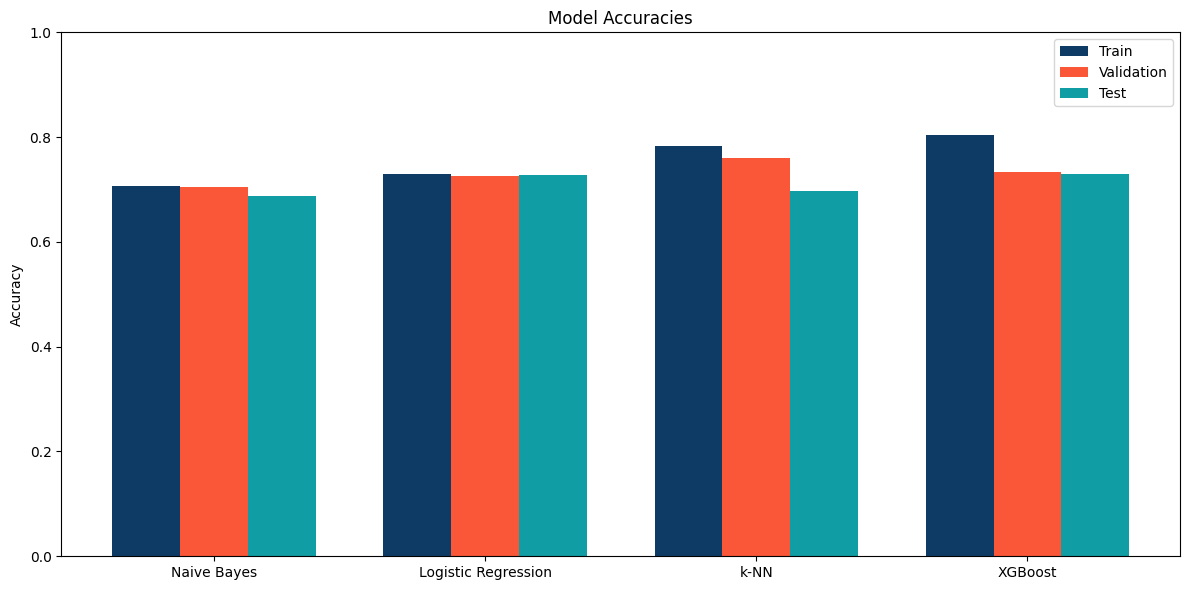

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ["Naive Bayes", "Logistic Regression", "k-NN", "XGBoost"]

train_acc = [0.7075, 0.7290, 0.7830, 0.8046]
val_acc   = [0.7042, 0.7253, 0.7595, 0.7338]
test_acc  = [0.6885, 0.7279, 0.6980, 0.7295]

# Positions
x = np.arange(len(models))
width = 0.25

# Gradient-style professional colors
train_color = "#0D3B66"  # deep navy
val_color   = "#F95738"  # burnt orange
test_color  = "#119DA4"  # teal

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x - width, train_acc, width, label="Train", color=train_color)
plt.bar(x, val_acc, width, label="Validation", color=val_color)
plt.bar(x + width, test_acc, width, label="Test", color=test_color)

# Labels and formatting
plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


## Classification Metrics for All Models

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ["Naive Bayes", "Logistic Regression", "k-NN", "XGBoost"]

# Metrics extracted from your classification reports
precision_no = [0.71, 0.68, 0.69, 0.73]
precision_yes = [0.74, 0.75, 0.70, 0.74]

recall_no = [0.77, 0.80, 0.71, 0.76]
recall_yes = [0.68, 0.61, 0.70, 0.71]

f1_no = [0.74, 0.73, 0.73, 0.74]
f1_yes = [0.71, 0.67, 0.67, 0.72]

# 2×2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()

metric_labels = ["Precision", "Recall", "F1-score"]

for i, model in enumerate(models):
    no_vals = [precision_no[i], recall_no[i], f1_no[i]]
    yes_vals = [precision_yes[i], recall_yes[i], f1_yes[i]]

    ax = axes[i]
    x = np.arange(3)
    width = 0.35

    # Bars
    ax.bar(x - width/2, no_vals, width, label="No CVD")
    ax.bar(x + width/2, yes_vals, width, label="CVD")

    # Labels and formatting
    ax.set_title(model, fontsize=13)
    ax.set_xticks(x)
    ax.set_xticklabels(metric_labels)
    ax.set_ylim(0, 1)

    if i % 2 == 0:  # left column
        ax.set_ylabel("Score")

# Suptitle
fig.suptitle("Classification Metrics for All Models", fontsize=16, weight='bold')

# Legend at lower center
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2, fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.show()
